In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import json
import os

from okapy import anonymize, fetch, preprocess_sampling_data, RESOURCE_NAMES
from okapy.tools.paths import DATA_PATH

In [3]:
os.makedirs(DATA_PATH, exist_ok=True)

In [4]:
RESOURCE_NAMES

['ehpads',
 'services',
 'soins',
 'animations',
 'chambres',
 'patients_actifs',
 'activites_planifiees',
 'soins_planifies',
 'hospitalisations',
 'sejours',
 'vacances',
 'consultations_specialisees',
 'consultations_pedicure',
 'practitioner']

In [5]:
resource_names = [
#    "ehpads",
#    "services",
#    "soins",
#    "animations",
#    "chambres",
#    "patients_actifs",
    "activites_planifiees",
#    "soins_planifies",
#    "hospitalisations",
#    "sejours",
#    "vacances",
#    "consultations_specialisees",
#    "consultations_pedicure",
#    "practitioner",
]

In [6]:
resource_bundles = fetch(resource_names=resource_names, all_pages=True)

In [7]:
print("Loaded resources:")
for resource_name in resource_bundles:
    print(f"- {resource_name}")

Loaded resources:
- activites_planifiees


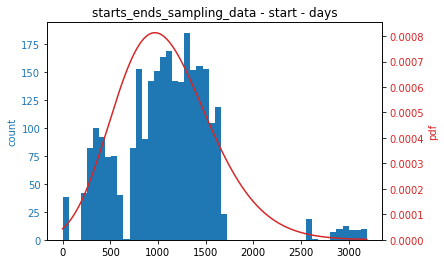

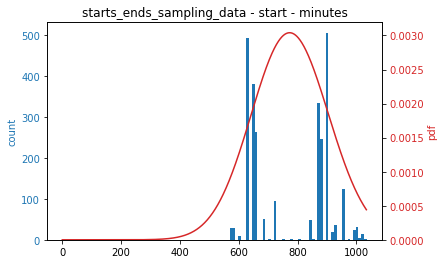

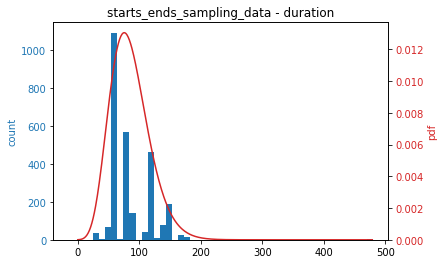

In [8]:
for resource_name, resource_bundle in resource_bundles.items():
    
    resource_sampling_data = preprocess_sampling_data(
        resource_name=resource_name, 
        resource_bundle=resource_bundle,
        id_suffix="-1",
    )
    
    for title, sampling_data in resource_sampling_data.items():
        if hasattr(sampling_data, "hist"):
            sampling_data.hist(title=title)
        
    resource = anonymize(
        resource_name=resource_name, 
        resource_bundle=resource_bundle, 
        resource_sampling_data=resource_sampling_data,
        id_suffix="-1",
    )
    
    with open(os.path.join(DATA_PATH, f"fake_{resource_name}.json"), "w") as f:
        json.dump(resource, f, ensure_ascii=False)